In [ ]:
from openai import OpenAI
import pandas as pd

In [ ]:
client = OpenAI()

In [ ]:
# encode this combined text and output a single vector embedding.
def get_embedding(text, model="text-embedding-ada-002"):
   text = text.replace("\n", " ")
   print (text)
   return client.embeddings.create(input = [text], model=model).data[0].embedding

df = pd.read_csv('output/embedded_sampled_data100.csv')
try:
#   df['ada_embedding'] = df["Summary"].astype(str).apply(lambda x: get_embedding(x, model='text-embedding-ada-002'))
   df['ada_embedding_score'] = df["Score"].astype(str).apply(lambda x: get_embedding(x, model='text-embedding-ada-002'))

except Exception as e:
   print("Exception" , e)   
   
df.to_csv('output/embedded_sampled_data100.csv', index=False)

In [ ]:
# To load the data from a saved file, you can run the following:
import pandas as pd
import numpy as np 

df = pd.read_csv('output/embedded_sampled_data100.csv')
df['ada_embedding'] = df.ada_embedding.apply(eval).apply(np.array)

In [ ]:
# Data visualization in 2D
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib

df = pd.read_csv('output/embedded_sampled_data100.csv')
matrix = df.ada_embedding_score.apply(eval).to_list()
# Convert the list 'matrix' to a NumPy array
matrix_array = np.array(matrix)

In [24]:
column_data_types = df.dtypes
print(column_data_types)

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
ada_embedding             object
ada_embedding_score       object
dtype: object


In [19]:
# Create a t-SNE model and transform the data
tsne = TSNE(n_components=2, perplexity=15, random_state=42, init='random', learning_rate=200)
vis_dims = tsne.fit_transform(matrix_array)

Text(0.5, 1.0, 'Amazon ratings visualized in language using t-SNE')

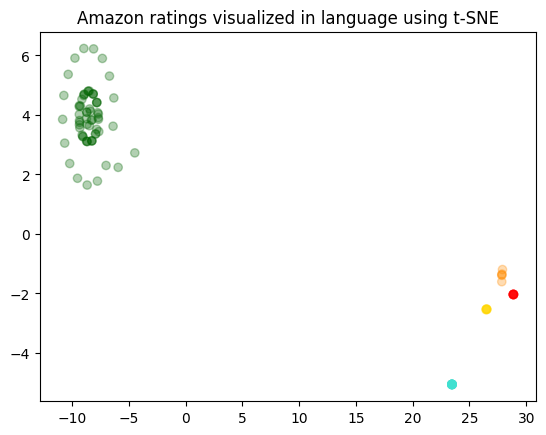

In [21]:
colors = ["red", "darkorange", "gold", "turquoise", "darkgreen"]
x = [x for x,y in vis_dims]
y = [y for x,y in vis_dims]
color_indices = df.Score.values - 1

colormap = matplotlib.colors.ListedColormap(colors)
plt.scatter(x, y, c=color_indices, cmap=colormap, alpha=0.3)
plt.title("Amazon ratings visualized in language using t-SNE")

In [ ]:
# Embedding as a text feature encoder for ML algorithms
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    list(df.ada_embedding.values),
    df.Score,
    test_size = 0.2,
    random_state=42
)

In [ ]:
# Regression using the embedding features
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(X_train, y_train)
preds = rfr.predict(X_test)

In [ ]:
# Classification using the embedding features
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)

In [ ]:
# Zero-shot classification
from openai.embeddings_utils import cosine_similarity, get_embedding

df= df[df.Score!=3]
df['sentiment'] = df.Score.replace({1:'negative', 2:'negative', 4:'positive', 5:'positive'})

labels = ['negative', 'positive']
label_embeddings = [get_embedding(label, model=model) for label in labels]

def label_score(review_embedding, label_embeddings):
   return cosine_similarity(review_embedding, label_embeddings[1]) - cosine_similarity(review_embedding, label_embeddings[0])

prediction = 'positive' if label_score('Sample Review', label_embeddings) > 0 else 'negative'

In [ ]:
# Obtaining user and product embeddings for cold-start recommendation
user_embeddings = df.groupby('UserId').ada_embedding.apply(np.mean)
prod_embeddings = df.groupby('ProductId').ada_embedding.apply(np.mean)

In [25]:
# Clustering
import numpy as np
from sklearn.cluster import KMeans

matrix = np.vstack(df.ada_embedding.values)
n_clusters = 4

kmeans = KMeans(n_clusters = n_clusters, init='k-means++', random_state=42)
kmeans.fit(matrix)
df['Cluster'] = kmeans.labels_

ValueError: could not convert string to float: '[-0.00546935573220253, -0.008380935527384281, -0.017865480855107307, -0.001936184475198388, -0.009594905190169811, 0.045754324644804, -0.023928837850689888, -0.010542711243033409, -0.008335493505001068, -0.016541149467229843, 0.006861850619316101, 0.011152941733598709, 0.00491430563852191, -0.008036869578063488, -0.02388988621532917, -0.004391713999211788, 0.03445856645703316, -0.007699294947087765, 0.02103348635137081, -0.014931179583072662, -0.003953516483306885, 0.0028499076142907143, 0.0031420395243912935, -0.007140998728573322, -0.016151640564203262, 0.0017949873581528664, 0.013736684806644917, -0.019384564831852913, -0.006796932313591242, 0.0015718311769887805, 0.008160213939845562, 0.005118797533214092, -0.008199164643883705, -0.021150339394807816, -0.01550245936959982, 0.00024608042440377176, -0.013736684806644917, -0.0210464708507061, 0.012496748007833958, -0.006803424097597599, 0.007030637934803963, 0.01419111154973507, 0.00021788160665892065, -0.010607629083096981, 0.00991300493478775, -0.0015442409785464406, -0.024552052840590477, 0.02250063791871071, -0.043001797050237656, -0.012126713991165161, 0.011535958386957645, 0.011315236799418926, -0.011445073410868645, 0.012730453163385391, -0.02973252162337303, 0.004346271511167288, -0.01041936594992876, -0.0006422841688618064, -0.00035035525797866285, 0.013957406394183636, 0.019787058234214783, 0.004498829133808613, -0.013827569782733917, 0.005569979082792997, -0.011308745481073856, 0.011607368476688862, 0.003002465469762683, 0.012295501306653023, 0.005079846829175949, 0.011503499932587147, 0.02770707570016384, -0.008601657114923, 0.009867561981081963, 0.020176567137241364, -0.0008585428004153073, 0.008413394913077354, -0.008075820282101631, 0.013113470748066902, 0.0032702528405934572, 0.006985194981098175, 0.00439496012404561, -0.028589962050318718, -0.005475847516208887, 0.01517786830663681, 0.020371321588754654, -0.0004925666144117713, 0.009666315279901028, 0.03214747831225395, -0.02286417968571186, -0.020137615501880646, 0.015580360777676105, 0.013892488554120064, 0.020579060539603233, 0.010094775818288326, -0.014243046753108501, 0.008750969544053078, 0.006313291843980551, 0.023396508768200874, 0.008471821434795856, -0.02042325586080551, 0.0035445319954305887, 0.012373403646051884, 0.0026032186578959227, -0.002775251865386963, -0.01234094426035881, -0.013502979651093483, -0.019111908972263336, -0.026590483263134956, 0.013321208767592907, -0.017696693539619446, -0.031108787283301353, 0.022695392370224, 0.009653331711888313, -0.021916374564170837, 0.0037425325717777014, -0.01864449866116047, -0.0013527324190363288, 0.006907293107360601, -0.012301993556320667, -0.016060754656791687, 0.014775375835597515, 0.023448443040251732, 0.024019723758101463, -0.029291078448295593, 0.023240704089403152, 0.015333672054111958, -0.03399115428328514, -0.014814326539635658, 0.0003288511070422828, 0.019514402374625206, 0.0450272411108017, -0.009536479599773884, 0.015138917602598667, 0.014931179583072662, -0.0011936828959733248, -0.005748503841459751, -0.024746807292103767, -0.002900219289585948, -0.01101661380380392, -0.010484284721314907, 0.007498048711568117, 0.030459605157375336, -0.016930658370256424, 0.015827050432562828, 0.004291091114282608, 0.022007260471582413, 0.0014103472931310534, -0.006537259556353092, -0.0029213177040219307, -0.004099582321941853, -0.006770965177565813, -0.011763172224164009, 0.007874573580920696, -0.005615421570837498, 0.0069981785491108894, 0.0027103335596621037, 0.005845881067216396, 0.023565296083688736, 0.02994026057422161, 0.015697212889790535, -0.005842635408043861, -0.0035283025354146957, 0.0046059442684054375, -0.007459097541868687, 0.017501939088106155, 0.024552052840590477, 0.008718510158360004, 0.018177088350057602, 0.014113210141658783, -0.016515182331204414, -0.016099706292152405, 0.00036557044950313866, -0.04515707865357399, 0.006147750653326511, -0.009666315279901028, 0.02999219484627247, 0.01043884176760912, -0.005073355045169592, -0.029057372361421585, -0.0033789908047765493, -0.03708126023411751, 0.0012561666080728173, 0.01345104444772005, 0.013632815331220627, -0.017670726403594017, 0.008861330337822437, -0.018254989758133888, 0.011438581161201, 0.019384564831852913, 0.01678783819079399, -0.0006394439842551947, 0.007244867738336325, 0.017268233001232147, -0.005420667119324207, -0.6855358481407166, -0.014048292301595211, 0.006394439842551947, 0.002736300928518176, 0.014736424200236797, 0.0323292501270771, 0.04326146841049194, -0.012743436731398106, 0.021708635613322258, 0.0005854807677678764, 0.0009461823501624167, 0.010516743175685406, -0.028719797730445862, 0.005615421570837498, -0.005839389283210039, -0.02246168628334999, -0.012379894964396954, -0.015840033069252968, 0.00431056646630168, 0.0009177806205116212, 0.004982469603419304, 0.0018534137634560466, -0.009069068357348442, -0.010873793624341488, 0.026045169681310654, 0.0119579266756773, 0.001868020393885672, -0.013593864627182484, -0.029109306633472443, 0.0034082038328051567, 0.0010192153276875615, 0.037756409496068954, -0.0069657196290791035, 0.014411834068596363, 0.0632043331861496, -0.005767979193478823, -0.00779667217284441, 0.02146194688975811, 0.01377563551068306, 0.00923136342316866, -0.05001295730471611, -0.005170732270926237, -0.004589714575558901, 0.0020222009625285864, -0.014256030321121216, 0.01961827091872692, -0.0018874957459047437, 0.019774073734879494, 0.0011539204278960824, -0.0005875094211660326, 0.004268369637429714, 0.0010167808504775167, -0.004209943115711212, 0.013541930355131626, 0.011380155570805073, -0.013139437884092331, 0.027836911380290985, -0.01498311385512352, -0.00983510259538889, -0.01600882038474083, -0.013567897491157055, 0.013022584840655327, 0.0001406898518325761, -0.003580237040296197, -0.013840554282069206, 0.012990125454962254, -0.019488435238599777, -0.005261617712676525, 0.000668251421302557, -0.026979992166161537, 0.007251359522342682, 0.018982073292136192, 0.011548942886292934, 0.0011652811663225293, 0.004021680448204279, -0.0030381702817976475, 0.02955075167119503, -0.001668396987952292, -0.01759282499551773, 0.016125673428177834, 0.005203191190958023, -0.008348477073013783, -0.0071150315925478935, -0.0025561528746038675, 0.027265630662441254, -0.03243311867117882, -0.001747921691276133, 0.02853802777826786, -0.011691762134432793, -0.003013825975358486, 0.023591263219714165, 0.011587893590331078, 0.010055824182927608, -0.014671506360173225, 0.017891447991132736, 0.023760050535202026, -0.007426638621836901, -0.007920016534626484, 0.01599583774805069, -0.021760569885373116, 0.015307704918086529, 0.013762651942670345, -0.0010338218417018652, -5.6397660955553874e-05, 0.014606588520109653, -0.01661905087530613, 0.0010963055538013577, 0.01902102306485176, 0.014217079617083073, -0.04185923561453819, 0.010575169697403908, -0.0020222009625285864, -0.018774334341287613, 0.006008176598697901, 0.010276546701788902, -0.021539848297834396, -0.0033497775439172983, 0.03144636005163193, -0.010003889910876751, -0.022578539326786995, 0.007712278515100479, 0.0034763680305331945, -0.017073478549718857, 0.0037490243557840586, 0.019332630559802055, 0.0038950901944190264, -0.018488693982362747, 0.013035568408668041, 0.005888077896088362, 0.0013446175726130605, 0.004297582898288965, 0.012477272190153599, 0.016865741461515427, -0.023824969306588173, 0.022812245413661003, -0.000747776182834059, -0.029446881264448166, -0.00475525576621294, 0.015216819010674953, -0.0018112169345840812, -0.02068292908370495, 0.016242526471614838, 0.004203451331704855, -0.00035603559808805585, -0.005754995625466108, -0.024422215297818184, -0.008971691131591797, -0.014424817636609077, -0.037159159779548645, 0.007868082262575626, 0.0013884373474866152, 0.006212668959051371, -0.020760830491781235, 0.00980913545936346, -0.0005960299749858677, -0.018306924030184746, 0.004524796269834042, 0.0005323289660736918, -0.0024019721895456314, -0.009185921400785446, 0.03557515889406204, 0.022189030423760414, -0.027629172429442406, 0.004823420196771622, 0.005732274614274502, -0.01135418750345707, 0.004304074682295322, 0.008783427998423576, -0.0016813805559650064, -0.02492857724428177, -0.003807450644671917, 0.0003779454855248332, -0.008140738122165203, 0.01539858989417553, 0.008530247956514359, -0.021968308836221695, -0.003026809776201844, -0.006245127879083157, -0.003206957597285509, 0.017501939088106155, -0.011289269663393497, -0.01478835940361023, -0.020929617807269096, 0.003190728137269616, 0.017930397763848305, 0.013840554282069206, -0.018709417432546616, 0.030018161982297897, -0.015450524166226387, 0.013749668374657631, -0.000668251421302557, 0.002513956045731902, -0.011347696185112, 0.008335493505001068, 0.011990386061370373, -0.03256295248866081, 0.017553873360157013, 0.01760580763220787, 0.015463507734239101, 0.016450263559818268, 0.01346402894705534, -0.022786278277635574, 0.03303036466240883, 0.011990386061370373, -0.00501492852345109, -0.037366900593042374, 0.012496748007833958, -0.006534013897180557, 0.013269273564219475, 0.021189291030168533, -0.008088803850114346, -0.04541675001382828, 0.004463124088943005, -0.013983373530209064, 0.015580360777676105, 0.019683189690113068, 0.013016093522310257, 0.020488174632191658, 0.004109320230782032, 0.0014022324467077851, -0.010198644362390041, 0.008153722621500492, 0.007770705036818981, 0.019540369510650635, 0.011490516364574432, -0.009659823961555958, -0.010192153044044971, -0.0164113137871027, 0.019683189690113068, 0.011347696185112, -0.019475450739264488, 0.0003832200600299984, -0.009854578413069248, 5.842635437147692e-05, -0.006163980346173048, 0.003489351598545909, 0.02812255173921585, -0.01071798987686634, -0.005965979769825935, -0.008530247956514359, 0.017359118908643723, 0.016294460743665695, 0.009036608971655369, 0.014580621384084225, 0.005472601857036352, -0.01175668090581894, 0.04027523100376129, 0.016645018011331558, -0.020332371816039085, 0.008978183381259441, -0.015009080991148949, -0.019189810380339622, -0.021773554384708405, 0.011633336544036865, 0.018748367205262184, -0.04637753963470459, 0.0011011745082214475, 0.01759282499551773, 0.0001281119475606829, 0.047883640974760056, -0.007777196820825338, 0.0003789598122239113, -0.010893268510699272, -0.004761747550219297, 0.01101661380380392, -0.011172416619956493, 0.004291091114282608, -0.009900021366775036, -0.043832749128341675, -0.025149298831820488, -0.00779667217284441, -0.018774334341287613, 0.007225392386317253, -0.012172156944870949, -0.009640348143875599, 0.0031858591828495264, -0.013515963219106197, -0.005027912091463804, 0.013087502680718899, 0.00521942088380456, -0.007764213252812624, -0.019488435238599777, 0.02892753668129444, 0.015125934034585953, -0.015749147161841393, -0.008861330337822437, -0.002853153506293893, -0.0014566014287993312, 0.021111389622092247, -0.0009534856071695685, 0.006407423410564661, 0.02246168628334999, 0.01507399883121252, 0.00779667217284441, -0.010705006308853626, 0.010432349517941475, 0.03396518528461456, -0.00831601768732071, 0.015346655622124672, -0.002905088011175394, 0.02999219484627247, -0.01819007098674774, -0.03741883486509323, -0.027784977108240128, 0.03466630354523659, -0.0022039718460291624, -0.016541149467229843, -0.004953256342560053, 0.0030057113617658615, -0.02063099481165409, 0.002684366423636675, -0.035730961710214615, -0.006313291843980551, -0.009633856825530529, -0.0001974932529265061, -0.004810436628758907, -0.013736684806644917, -0.0010013628052547574, 0.00923136342316866, 0.02426641248166561, -0.00951051153242588, -0.0031517772004008293, -0.015294721350073814, 0.009568938054144382, 0.11051668971776962, 0.017904430627822876, 0.013801602646708488, 0.01841079257428646, -0.011944943107664585, -0.005440142471343279, 0.00561866769567132, -0.01263956818729639, 0.011302253231406212, 0.008575689978897572, 0.003645155346021056, -0.009874053299427032, -0.008380935527384281, -0.014619572088122368, 0.004609189927577972, 0.005229158792644739, -0.012327960692346096, -0.002673005685210228, -0.010782907716929913, -0.02388988621532917, 0.0028012190014123917, 0.0029310553800314665, -0.009250839240849018, -0.01263956818729639, 0.008030377328395844, -0.02346142753958702, 0.007426638621836901, -0.0035834829322993755, 0.030225900933146477, 0.012113730423152447, -0.029888326302170753, -0.000990813598036766, 0.0007116654305718839, 0.01596987061202526, -0.007192933466285467, 0.012769403867423534, 0.0032588921021670103, 0.0035737452562898397, 0.015554393641650677, 0.004469615872949362, 0.040015559643507004, 0.005462863948196173, -0.000702333461958915, 0.004739026539027691, -0.007952475920319557, -0.01683977246284485, 0.002513956045731902, 0.02126719243824482, 0.010614120401442051, -0.02595428377389908, 0.025772513821721077, 0.010192153044044971, -0.008458837866783142, 0.009289789944887161, 0.015567377209663391, 0.0010946826077997684, -0.006339259445667267, 0.002536677522584796, -0.0031176952179521322, 0.0072383759543299675, -0.00703712971881032, -0.024383265525102615, 0.0017170856008306146, -0.0036970898509025574, 0.008322509005665779, -0.03256295248866081, -0.021721620112657547, -0.004456632304936647, 0.0026226940099149942, -0.016930658370256424, -0.043625012040138245, 0.013905472122132778, -0.04796154424548149, -0.008718510158360004, 0.003836663905531168, 0.027577238157391548, 0.004378730431199074, -0.005595946218818426, 0.008725002408027649, 0.0244611669331789, -0.016930658370256424, -0.013003109022974968, 0.0073811961337924, -0.0005380093352869153, -0.013412093743681908, 0.021981293335556984, 0.0008901904220692813, 0.002502595540136099, -0.03201764076948166, 0.009465069510042667, 0.01507399883121252, 0.014853277243673801, 0.009958446957170963, -0.013269273564219475, -0.011198384687304497, 0.01063359621912241, 0.022929098457098007, -0.003609450301155448, -0.005404437892138958, -0.013866521418094635, 0.008173197507858276, -0.01010775938630104, -0.02634379267692566, -0.014320948161184788, 0.010789399966597557, 0.009906512685120106, -0.00285964529030025, 0.011211368255317211, 0.005459618289023638, -0.0164113137871027, 0.007439622189849615, -0.014541669748723507, -0.007887558080255985, -0.01638534665107727, -0.011412614025175571, 0.01419111154973507, -0.002061151899397373, 0.005589454434812069, 0.0035672534722834826, -0.00592378294095397, 0.017501939088106155, -0.006186701823025942, 0.03788624331355095, 0.023240704089403152, -0.016670987010002136, 0.00026839604834094644, 0.020527126267552376, -0.02487664297223091, -0.014372882433235645, 0.008653592318296432, 0.018060235306620598, 0.007933000102639198, -0.011152941733598709, -0.024785757064819336, -0.018943121656775475, -0.01397038996219635, -0.00643339054659009, 0.010296021588146687, 0.006196439266204834, 0.002325693378224969, -0.0010630349861457944, 0.003443908877670765, -0.02752530388534069, -0.042638253420591354, 0.013528946787118912, -0.014437801204621792, -0.00035826716339215636, -0.011497007682919502, -0.020799782127141953, 0.03832768648862839, -0.02148791402578354, 0.0044533866457641125, -0.026071136817336082, -0.002038430655375123, 0.003479613922536373, -0.025447921827435493, 0.009549463167786598, 0.0011944943107664585, 0.01960528828203678, 0.01924174651503563, 0.019592303782701492, -0.016502199694514275, 0.024448182433843613, -0.008699034340679646, -0.0010695268865674734, 0.005754995625466108, 0.004239156376570463, -0.0021212012507021427, -0.005959487985819578, 0.02451310120522976, 0.021358078345656395, 0.01599583774805069, 0.027655139565467834, 0.006446374114602804, -0.010192153044044971, 0.041989073157310486, 0.013723701238632202, -0.0164113137871027, 0.015307704918086529, -0.01699557714164257, -0.004174238536506891, 0.0030673835426568985, 0.012412354350090027, 0.0012626583920791745, 0.0008528624312020838, 0.01846272684633732, 0.010380415245890617, -0.01456763781607151, 0.0028288091998547316, -0.00456050131469965, 0.01680082269012928, -0.02791481278836727, 0.01781354658305645, 0.00692676892504096, 0.003155023092404008, -0.003976237960159779, -0.0331861674785614, 0.0038106965366750956, 9.44863713812083e-05, -0.004920797422528267, 0.010893268510699272, 0.022552572190761566, -0.002684366423636675, -0.011075039394199848, -0.013502979651093483, 0.012548682279884815, -0.01297065056860447, -0.011535958386957645, 0.003200465813279152, -0.02488962560892105, 0.0031598920468240976, -0.026369759812951088, -0.014502719044685364, -0.039755888283252716, 0.02347441017627716, -0.00552453612908721, -0.022526605054736137, 0.023811984807252884, -0.012464288622140884, -0.024785757064819336, -0.0020871192682534456, -0.004829911980777979, 0.03277069330215454, 0.006556735374033451, 0.013132945634424686, 0.004443648736923933, -0.001186379580758512, -0.009133986197412014, -0.0024409231264144182, 0.004547517746686935, -0.011944943107664585, 0.031861837953329086, 0.025019463151693344, 0.019929878413677216, 0.006861850619316101, 0.003609450301155448, 0.010309005156159401, -0.028875602409243584, -0.023941820487380028, 0.009276806376874447, 0.003479613922536373, -0.006339259445667267, 0.003586728824302554, -0.0057907006703317165, -0.007192933466285467, 0.008608149364590645, -0.015853017568588257, -0.006008176598697901, 0.0076019177213311195, -0.0071150315925478935, -0.021539848297834396, 0.010692022740840912, -0.008147230371832848, 0.009237855672836304, -0.017346134409308434, -0.0072383759543299675, -0.005975717678666115, -0.034718237817287445, 0.011633336544036865, 0.0023289392702281475, -0.014736424200236797, 0.03079717978835106, -0.004531288053840399, 0.024344313889741898, -0.005907553713768721, -0.01215268112719059, -0.004631911404430866, 0.01124382670968771, -0.003625679761171341, 0.02569461241364479, 0.027655139565467834, -0.006407423410564661, 0.0014322571223601699, 0.0052713556215167046, -0.0048169284127652645, -0.0077252620831131935, 0.0017966103041544557, 0.002043299376964569, -0.016346395015716553, -0.03336793929338455, 0.009737725369632244, 0.0012147813104093075, -0.005310306325554848, -0.015320688486099243, -0.016722921282052994, -0.01680082269012928, -0.007926508784294128, -0.018164103850722313, 0.012074779719114304, -0.002518825000151992, -0.005261617712676525, -0.0007177515071816742, 0.004041156265884638, 0.0002702218771446496, -0.015632295981049538, -0.009049592539668083, -0.010192153044044971, 0.025162283331155777, -0.02369513176381588, 0.03484807536005974, -0.0051804701797664165, 0.0017982333665713668, -0.011425597593188286, 0.04183327034115791, 0.004988961387425661, 0.009017134085297585, 0.005222667008638382, 0.01113346591591835, 0.028278354555368423, -0.012418845668435097, 0.003171252552419901, 6.83162288623862e-05, -0.00031830189982429147, 0.008679559454321861, -0.010503759607672691, 0.027836911380290985, -0.0053362734615802765, -0.024435199797153473, -0.038769129663705826, 0.007556475233286619, -0.0022607753053307533, -0.01487924437969923, 0.0010265185264870524, 0.018722400069236755, 0.016294460743665695, -0.005894569680094719, 0.018293939530849457, -0.019579319283366203, -0.043391305953264236, 0.0038009588606655598, -0.01785249635577202, 0.013788619078695774, 0.007660344243049622, -0.016528166830539703, -0.007283818908035755, 0.010380415245890617, -0.005842635408043861, 0.0011441827518865466, -0.007322769612073898, -0.016268493607640266, 0.0051804701797664165, -0.005066863261163235, -0.00346338446252048, 0.002088742097839713, -0.011185401119291782, -0.0017398069612681866, -0.01620357483625412, -0.013723701238632202, -0.030901048332452774, 0.006634636782109737, 0.008725002408027649, 0.021500898525118828, 0.02695402503013611, -0.026772253215312958, -0.022812245413661003, -0.012782387435436249, -0.015489475801587105, 0.005641389172524214, -0.019306663423776627, -0.00351856485940516, -0.0014322571223601699, -0.0023873657919466496, -0.0058199139311909676, 0.003184236353263259, -0.010899760760366917, 0.013477012515068054, -0.030641376972198486, -0.013944422826170921, 0.01983899250626564, 0.004258631728589535, -0.002366267377510667, -0.0050603714771568775, -0.026408711448311806, -0.01743702031672001, 0.013399110175669193, 0.010477792471647263, 0.00688781775534153, 0.007225392386317253, -0.008082312531769276, 0.027499336749315262, -0.006822899449616671, 0.019189810380339622, -0.0034568924456834793, 0.03222537785768509, -0.0017462987452745438, 0.00048810348380357027, 0.025772513821721077, 0.0030333015602082014, -0.02307191677391529, -0.008737985976040363, -0.03097895160317421, 0.0036841060500591993, 0.0005903496057726443, 0.00734224496409297, -0.016060754656791687, 0.009036608971655369, -0.0017884955741465092, 0.0076343766413629055, 0.012055303901433945, -0.017488954588770866, -0.0025772512890398502, 0.021345093846321106, 0.000645530060864985, -0.030641376972198486, 0.016904691234230995, -0.011302253231406212, -0.026265891268849373, -0.022318866103887558, -0.01742403768002987, -0.022760311141610146, 0.007433130405843258, -0.006848867051303387, -0.0073876879177987576, -0.02351336181163788, 0.015567377209663391, -0.00931575708091259, -0.020098665729165077, -0.02695402503013611, 0.01195143535733223, -0.003353023435920477, -0.007472081575542688, -0.006079586688429117, -0.0075110322795808315, -0.0011376909678801894, -0.018319908529520035, -0.033108267933130264, 0.011289269663393497, -0.01680082269012928, -0.02205919474363327, -0.013288749381899834, -0.033290036022663116, 0.0015767000149935484, 0.005592700559645891, 0.036769650876522064, -0.01498311385512352, 0.009906512685120106, 0.22955064475536346, 0.003872368950396776, -0.020163584500551224, 0.05650477483868599, 0.012788879685103893, -0.014217079617083073, 0.046844951808452606, 0.01900804042816162, 0.002645415486767888, 0.004219681024551392, -0.026006218045949936, -0.005625159479677677, 0.01498311385512352, -1.4251567336032167e-05, 0.0027898582629859447, 0.003138793632388115, -0.0029781211633235216, -0.01724226586520672, -0.03399115428328514, -0.020981552079319954, -0.00031505600782111287, -0.0021309389267116785, -0.012522715143859386, -0.00881588738411665, 0.03547128662467003, 0.024798741564154625, 0.0038626310415565968, 0.015943903475999832, -0.015645278617739677, 0.02044922299683094, -0.0046384031884372234, 0.001308912644162774, 0.015930918976664543, -0.002673005685210228, -0.005086338613182306, -0.009023625403642654, -0.019124893471598625, -0.01397038996219635, 0.01365878339856863, 0.004651386756449938, -0.02838222309947014, 0.001804725150577724, 0.002627562964335084, 0.01819007098674774, -0.01550245936959982, 0.027681108564138412, -0.00520968297496438, -0.01550245936959982, 0.0019232007907703519, 0.01175668090581894, 0.0023695132695138454, -0.0014014210319146514, 0.018306924030184746, 0.008043360896408558, -0.013308225199580193, 0.007588934153318405, 0.020540108904242516, 0.019540369510650635, -0.03201764076948166, 0.010601136833429337, -0.008874313905835152, 0.012269534170627594, 0.002275381935760379, 0.044040486216545105, 0.011834582313895226, 0.02246168628334999, -0.03702932596206665, 0.016528166830539703, 0.017553873360157013, -0.014528686180710793, 0.004430665168911219, 0.0017235773848369718, 0.0018858727999031544, -0.00673201447352767, -0.014437801204621792, -0.017735643312335014, 0.026590483263134956, 0.029472848400473595, -0.001968643395230174, 0.01844974420964718, -0.0031306787859648466, 0.0032767446245998144, -0.022955065593123436, 0.005342765245586634, -0.0072383759543299675, -0.043391305953264236, 0.0002685989311430603, 0.013957406394183636, 0.005657618399709463, -0.007316277828067541, 0.01468448992818594, -0.012444812804460526, -0.014541669748723507, -0.010984154418110847, -0.003736040787771344, 0.0158010832965374, -0.016138657927513123, 0.030251868069171906, 0.009387167170643806, 0.006521030329167843, -0.030070096254348755, -0.00010133320756722242, 0.02369513176381588, 0.014100226573646069, -0.018761351704597473, -0.006287324707955122, 0.01275642029941082, 0.018774334341287613, 0.0018144628265872598, -0.007050113286823034, -0.006384701933711767, -0.014087243005633354, 0.011419106274843216, -0.00033331423765048385, -0.0009007396292872727, 0.008127754554152489, -0.012600616551935673, -0.0401453971862793, 0.009672807529568672, -0.01800830103456974, -0.0028921044431626797, -0.04113215208053589, -0.017735643312335014, 0.0316021665930748, -0.001350297941826284, -0.005793946795165539, -0.020371321588754654, 0.012717469595372677, 0.026798220351338387, -0.01864449866116047, 0.0035315484274178743, -0.0006962473853491247, 0.0016221427358686924, -0.006894309539347887, -0.0012723961845040321, 0.014944163151085377, -0.012107239104807377, 0.006559981033205986, -0.022214997559785843, 0.012996617704629898, 0.019488435238599777, 0.00040269552846439183, 0.023993754759430885, 0.020721880719065666, 0.00020591232168953866, -0.012217599898576736, 0.007673327811062336, -0.002634054748341441, -0.028797701001167297, -0.028719797730445862, -0.016541149467229843, 0.0025577759370207787, -0.0025058414321392775, -0.04066474363207817, 0.021371060982346535, -0.01803426817059517, -0.032277315855026245, -0.0003170846903230995, 0.006491817068308592, 0.034146957099437714, -0.007549982983618975, 0.034406628459692, 0.015904951840639114, -0.0036970898509025574, -0.005112305749207735, -0.009523495100438595, -0.16650211811065674, 0.011685270816087723, 0.011230843141674995, -0.011113991029560566, 0.004777977243065834, 0.0012537321308627725, 0.009270315058529377, 0.003195596858859062, -0.005440142471343279, -0.011088023893535137, 0.016891708597540855, -0.010614120401442051, -0.032095544040203094, 0.013619831763207912, 0.005170732270926237, 0.00723188417032361, -0.030329769477248192, 0.008913264609873295, 0.027862878516316414, -0.0035315484274178743, 0.0153726227581501, 0.004933780990540981, -0.006248374003916979, -0.013230322860181332, -0.0006366037996485829, 0.0158010832965374, -0.02105945348739624, 0.02370811626315117, -0.006559981033205986, -0.017878463491797447, -0.006037389859557152, 0.007121523376554251, 0.004417681600898504, 0.00723188417032361, 0.02451310120522976, -0.0035283025354146957, -0.015930918976664543, -0.008257591165602207, -0.021319126710295677, 0.03238118439912796, -0.0005424724658951163, 0.004206697456538677, 0.002059528836980462, 0.011828090995550156, 0.0024701363872736692, 0.023824969306588173, -0.01033497229218483, -0.0023808737751096487, 0.005686831660568714, -0.03180990368127823, 0.010886777192354202, 0.00210010283626616, -0.00207251263782382, -0.009672807529568672, 0.009361200034618378, 0.008841854520142078, 0.0012691501760855317, 0.02028043568134308, 0.0010086661204695702, -0.02469487115740776, 0.00505387969315052, -0.02042325586080551, 0.026460645720362663, -0.006050373427569866, -0.015229802578687668, -0.029291078448295593, 0.006251619663089514, 0.0072968024760484695, -0.04700075462460518, 0.017475971952080727, -0.014827310107648373, -0.01839780993759632, 0.026187989860773087, -0.01961827091872692, -0.0015336917713284492, -0.0036062044091522694, -0.011568417772650719, 0.02814851887524128, 0.009568938054144382, 0.004063877277076244, -0.01002336572855711, 0.015411573462188244, -0.016878724098205566, -0.005952996201813221, -0.004446894861757755, 0.013029077090322971, -0.009815627709031105, -0.006060111336410046, 0.015022064559161663, -0.006537259556353092, 0.019761091098189354, -0.025136316195130348, -0.01821603812277317, -0.02490261010825634, 0.007426638621836901, 0.017488954588770866, 0.0061445049941539764, -0.0008747723186388612, -0.0009689037105999887, -0.005709553137421608, -0.007030637934803963, -0.023928837850689888, 0.012853797525167465, -0.00045036981464363635, 0.041002314537763596, 0.0005724971415475011, 0.03484807536005974, 0.011081531643867493, 0.04980522021651268, -0.02022850140929222, -0.003570499364286661, -0.0007368212100118399, 0.004924043081700802, -0.003654893022030592, 0.000421562377596274, 0.03204360976815224, 0.005754995625466108, -0.009406642988324165, 0.01599583774805069, -0.006121783517301083, 0.05655670911073685, -0.003830172121524811, 0.008997658267617226, 0.005634897388517857, 0.008887297473847866, -0.0029667604248970747, -0.10392100363969803, -0.0035932206083089113, 0.01865748129785061, 0.01365878339856863, -0.013308225199580193, 0.008660083636641502, 0.010575169697403908, 0.0008593542734161019, -0.011159433051943779, 0.010984154418110847, -0.018553612753748894, -0.02791481278836727, -0.007926508784294128, -0.02530510351061821, 0.023773033171892166, -0.009763692505657673, 0.006394439842551947, -0.01022461149841547, -0.009640348143875599, 0.023201754316687584, -0.00014109558833297342, 0.0018014792585745454, -0.004119057673960924, -0.011295761913061142, -0.002671382622793317, -0.03100491873919964, -0.04165149852633476, 0.020592043176293373, 0.028589962050318718, 0.013632815331220627, -0.006738506257534027, -0.0032540233805775642, 0.015216819010674953, 0.0012991748517379165, -0.03017396479845047, -0.013788619078695774, -0.05167486518621445, -0.005206437315791845, 0.02086469903588295, -0.006913784891366959, 0.010471301153302193, 0.0053038145415484905, -0.00952998735010624, -0.028096584603190422, 0.005654372740536928, -0.0043332879431545734, -0.0307452455163002, 0.015827050432562828, 0.02087768353521824, 0.002690858207643032, -0.008536739274859428, -0.004125549923628569, -0.004041156265884638, 0.008556215092539787, 0.013191372156143188, -0.01757984049618244, 0.030122030526399612, -0.007257851306349039, -0.0011019859230145812, 0.01274992898106575, -0.02652556449174881, -0.005378470290452242, -0.028589962050318718, -0.005128535442054272, 0.02572057954967022, 0.02244870364665985, 0.005920537281781435, -0.007660344243049622, 0.004222927149385214, -0.013905472122132778, -0.020501157268881798, 0.0013381257886067033, -0.009951955638825893, 0.02913527563214302, -0.0239158533513546, 0.010750449262559414, -0.020306402817368507, 0.011516483500599861, -0.0033919743727892637, -0.027369501069188118, -0.018709417432546616, -0.02469487115740776, 0.021929357200860977, -0.010588153265416622, 0.016761871054768562, 0.0023419230710715055, -0.021422995254397392, 0.01175668090581894, 0.007517524063587189, -0.03079717978835106, -0.01426901388913393, 0.01944948360323906, -0.007316277828067541, -0.010399891063570976, -0.005742012057453394, -0.0005696569569408894, 0.002502595540136099, -0.010198644362390041, 0.0182420052587986, 0.011776155792176723, -0.02447414956986904, -0.017566855996847153, -0.06169822812080383, 0.025772513821721077, 0.001691118348389864, -0.006293816491961479, 0.0024198247119784355, -0.0356270931661129, 0.01900804042816162, -0.0053038145415484905, 0.0016302575822919607, 0.006667096167802811, -0.005920537281781435, 0.01416514441370964, -0.013619831763207912, 0.005083092954009771, -0.020202534273266792, -0.009997398592531681, 0.0077836886048316956, -0.01041287463158369, 0.01721629872918129, 0.017359118908643723, -0.01162684429436922, -4.2044659494422376e-05, 0.014944163151085377, -0.003206957597285509, -0.008023886010050774, 0.00374577846378088, -0.004833157639950514, 0.012055303901433945, -0.005540765821933746, 0.014814326539635658, 0.011522974818944931, -0.004901322070509195, -0.00829005055129528, 0.007627884857356548, -0.013840554282069206, -0.02892753668129444, -0.012314977124333382, -0.0033757449127733707, 0.006624899338930845, -0.010367431677877903, -0.009406642988324165, -0.033497776836156845, 0.010159693658351898, -0.0323292501270771, -0.0024879889097064734, 0.014230063185095787, -0.020890668034553528, -0.008160213939845562, 0.01920279487967491, -0.017021544277668, 0.01112697459757328, 0.0032945971470326185, 0.035107746720314026, 0.0015896836994215846, 0.0018420530250295997, -0.006348996888846159, -0.0018858727999031544, -0.010386907495558262, -0.015749147161841393, 0.0013105355901643634, 0.023149820044636726, -0.005044141784310341, 0.0037749914918094873, 0.0037295487709343433, 0.01487924437969923, -0.041417792439460754, -0.016307445243000984, 0.00633276766166091, -0.005199945531785488, -0.016151640564203262, -0.03692545369267464, 0.0007676573586650193, 0.014152160845696926, 0.027473369613289833, 0.0013486749958246946, 0.010503759607672691, 0.002093611052259803, -0.0007197802187874913, -0.018073217943310738, 0.02511034905910492, 0.005566732957959175, 0.01032848097383976, -0.025162283331155777, 0.0026519072707742453, 0.009900021366775036, 0.0074785733595490456, -0.022383784875273705, -0.01864449866116047, 0.006465849932283163, 0.028044650331139565, 0.012853797525167465, 0.008075820282101631, 0.0012383140856400132, 0.0025058414321392775, -0.007894049398601055, 0.03669175133109093, 0.0009388790349476039, -0.009874053299427032, -0.003172875614836812, 0.028252387419342995, -0.0159828532487154, -0.00042764845420606434, 0.010575169697403908, -0.0030122031457722187, -0.0256816279143095, 0.018332891166210175, -0.022124111652374268, -0.027213696390390396, -0.011198384687304497, -0.0013081011129543185, 0.000750210601836443, 0.0046968297101557255, -0.005316798109561205, 0.03804204612970352, -0.017488954588770866, 0.018995055928826332, -0.01946246810257435, -0.02936897985637188, -0.02552582509815693, 0.022734344005584717, 0.002536677522584796, 0.0072059170342981815, 0.018683450296521187, -0.019345615059137344, 0.01986495964229107, 0.03199167549610138, 0.016956625506281853, -0.015515442937612534, 0.016515182331204414, -0.004962994251400232, 0.014905211515724659, 0.00881588738411665, -0.008763953112065792, -0.014411834068596363, 0.041002314537763596, -0.0073292613960802555, -0.004612436052411795, 0.031472329050302505, -0.009575430303812027, 0.04167746379971504, -0.0037587620317935944, -0.017255250364542007, -0.02347441017627716, 0.005849127192050219, 0.035756926983594894, 0.006228898651897907, 0.009958446957170963, -0.011678778566420078, -0.020812764763832092, 0.004625419620424509, -0.020981552079319954, 0.006686571519821882, 0.006134767085313797, -0.00526486337184906, -0.00942611787468195, -0.019761091098189354, -0.010925727896392345, -4.52905660495162e-05, 0.0158010832965374, 0.019748106598854065, 0.0024944806937128305, 0.01781354658305645, 0.018514662981033325, -0.0033497775439172983, 0.00980913545936346, 0.014009340666234493, 0.0024831199552863836, -0.00036273026489652693, -0.029109306633472443, 0.0023419230710715055, 0.013438060879707336, -0.04936377704143524, -0.014593604952096939, 0.004119057673960924, -0.019176827743649483, -0.012587632983922958, -0.001747921691276133, -0.0006844809395261109, 0.035315483808517456, -0.01416514441370964, 0.00027468500775285065, -0.026616450399160385, -0.03427679464221001, 0.005998438689857721, -0.002241299720481038, -0.01346402894705534, 0.007348736748099327, -0.0153726227581501]'

In [ ]:
# Text search using embeddings
from openai.embeddings_utils import get_embedding, cosine_similarity

def search_reviews(df, product_description, n=3, pprint=True):
   embedding = get_embedding(product_description, model='text-embedding-ada-002')
   df['similarities'] = df.ada_embedding.apply(lambda x: cosine_similarity(x, embedding))
   res = df.sort_values('similarities', ascending=False).head(n)
   return res

res = search_reviews(df, 'delicious beans', n=3)

In [ ]:
# Code search using embeddings
from openai.embeddings_utils import get_embedding, cosine_similarity

df['code_embedding'] = df['code'].apply(lambda x: get_embedding(x, model='text-embedding-ada-002'))

def search_functions(df, code_query, n=3, pprint=True, n_lines=7):
   embedding = get_embedding(code_query, model='text-embedding-ada-002')
   df['similarities'] = df.code_embedding.apply(lambda x: cosine_similarity(x, embedding))

   res = df.sort_values('similarities', ascending=False).head(n)
   return res
res = search_functions(df, 'Completions API tests', n=3)

In [26]:
# Recommendations using embeddings
def recommendations_from_strings(
   strings: List[str],
   index_of_source_string: int,
   model="text-embedding-ada-002",
) -> List[int]:
   """Return nearest neighbors of a given string."""

   # get embeddings for all strings
   embeddings = [embedding_from_string(string, model=model) for string in strings]

   # get the embedding of the source string
   query_embedding = embeddings[index_of_source_string]

   # get distances between the source embedding and other embeddings (function from embeddings_utils.py)
   distances = distances_from_embeddings(query_embedding, embeddings, distance_metric="cosine")

   # get indices of nearest neighbors (function from embeddings_utils.py)
   indices_of_nearest_neighbors = indices_of_nearest_neighbors_from_distances(distances)
   return indices_of_nearest_neighbors

NameError: name 'List' is not defined